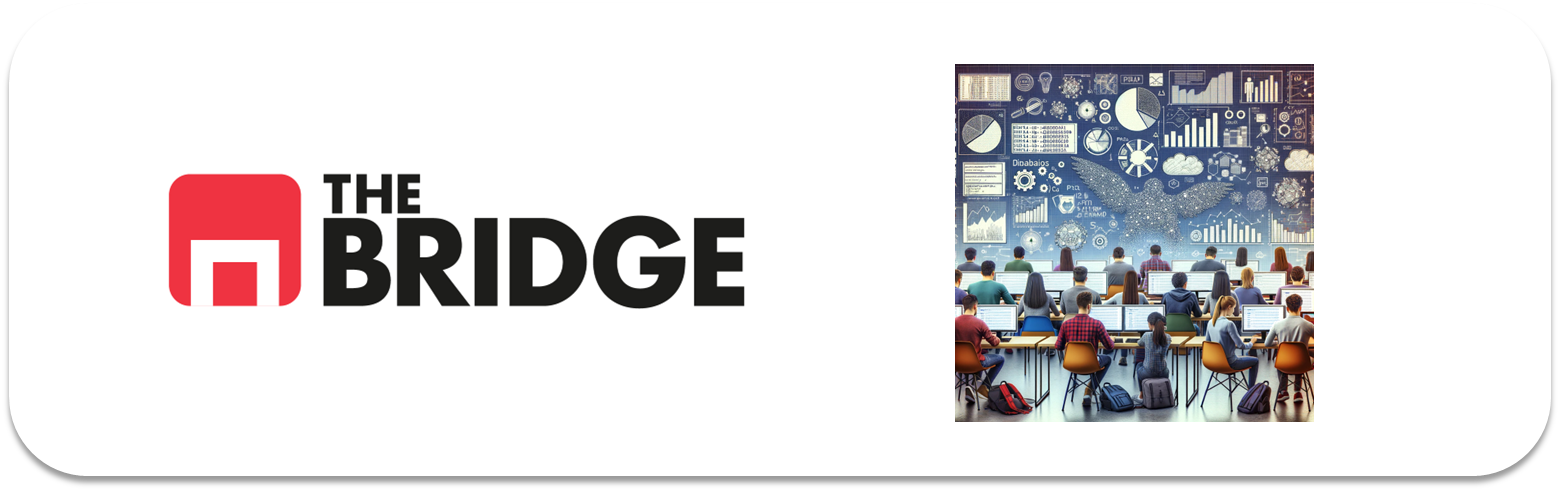

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton, viajaba solo y no pagó el billete. Para ello recuerda que la probabilidad del suceso unión de sucesos indepentientes es la suma de las probabilidades de los sucesos por separado (PISTA: Aplicalo a la edad)
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics, model_selection
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")

In [3]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [5]:
df_titanic.drop(columns= ["deck","embarked", "alive","adult_male", "class", "sibsp", "parch"], inplace= True)

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   fare         891 non-null    float64
 5   who          891 non-null    object 
 6   embark_town  889 non-null    object 
 7   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 49.7+ KB


In [7]:
df_titanic["alone"] = df_titanic["alone"].astype(int)

In [8]:
df_titanic["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

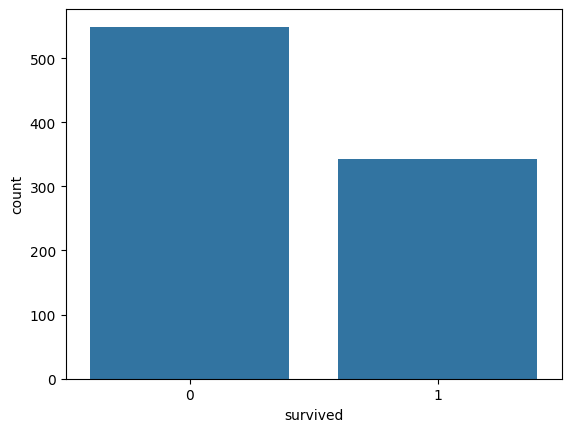

In [9]:
sns.countplot(df_titanic, x ="survived")

La varible target es una variable binaria que tiene 0 para los pasajeros que murieron y 1 para los que sobrevivieron, podemos observar que no esta balanceada, hay más mayor concentración en 0 que en 1, no pareciera que el desbalance sea mucho pero en este caso el accuracy no lo podríamos utilizar, nos inclinaremos más por el de precisión o el recall.

In [10]:
target = "survived"

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df_titanic.drop(columns = "survived"), df_titanic[["survived"]], test_size= 0.2, stratify= df_titanic["survived"], random_state= 42)

In [13]:
media_edad = X_train["age"].mean()
moda_embark = X_train["embark_town"].mode()[0]

X_train["age"].fillna(media_edad, inplace = True)
X_train["embark_town"].fillna(moda_embark, inplace = True)

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       712 non-null    int64  
 1   sex          712 non-null    object 
 2   age          712 non-null    float64
 3   fare         712 non-null    float64
 4   who          712 non-null    object 
 5   embark_town  712 non-null    object 
 6   alone        712 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 41.7+ KB


In [15]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   survived  712 non-null    int64
dtypes: int64(1)
memory usage: 11.1 KB


In [14]:
df_eda = X_train.copy()
df_eda[target] = y_train

In [15]:
df_eda.describe()

,pclass,age,fare,alone,survived
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.308989,29.807687,31.819826,0.609551,0.383427
std,0.833563,13.015054,48.059104,0.488194,0.486563
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,7.895800,0.000000,0.000000
50%,3.000000,29.807687,14.454200,1.000000,0.000000
75%,3.000000,36.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


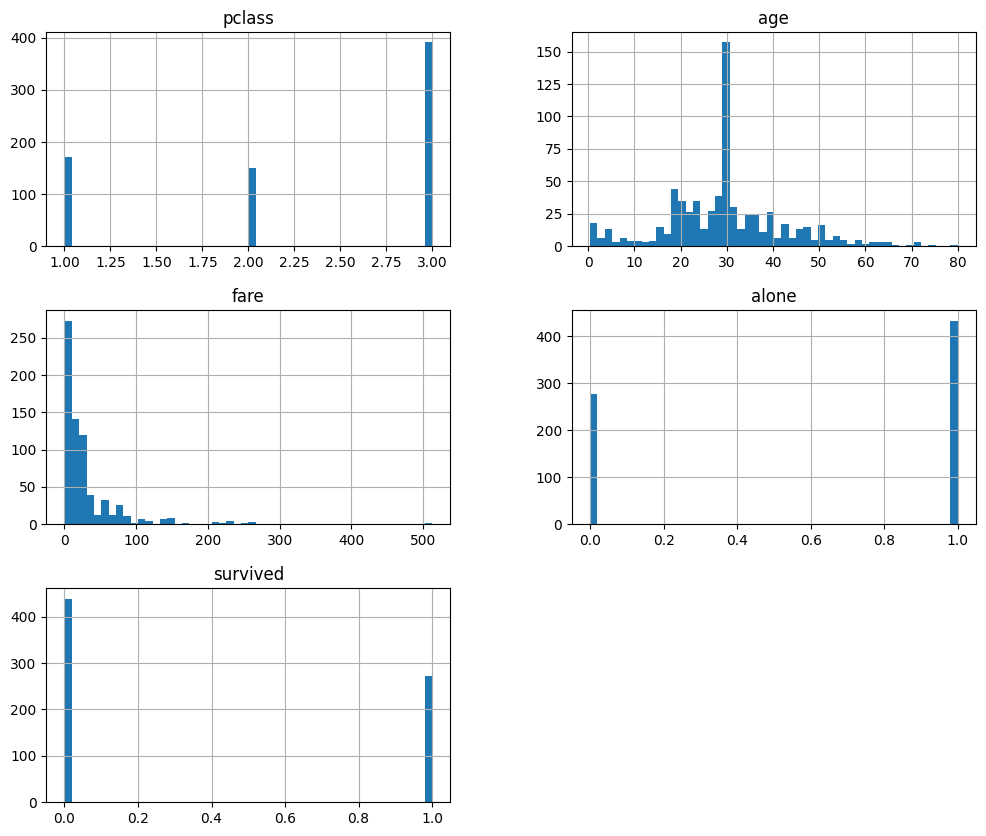

In [16]:
df_eda.hist(bins=50, figsize=(12, 10)) 
plt.show()

In [17]:
col_cat = ["sex", "who", "embark_town"]

In [18]:
def frecuencias_relativas(dataframe, columnas_categoricas):
    """
    Función que dado un dataframe y una lista con las columnas categóricas de éste
    pinta los gráficos de frecuencia relativa de cada columna con sus valores anotados 
    """
    num_cols = len(columnas_categoricas)
    num_filas = (num_cols // 2) + (num_cols % 2)
    fig, axes = plt.subplots(num_filas, 2, figsize=(15,5 * num_filas))
    axes = axes.flatten() 
    for i, col in enumerate(columnas_categoricas):
        ax = axes[i] if num_cols > 1 else axes
        freq = round(dataframe[col].value_counts()/len(dataframe)*100,2)
        barra = sns.barplot(x=freq.index, y=freq, ax=ax, palette='cool', hue = freq.index, legend = False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('Categorías')
        ax.set_ylabel('Frecuencia Relativa')
        ax.tick_params(axis='x', rotation=45)
        for index, value in enumerate(freq):
            barra.text(index, value, str(value), ha='center', va='bottom')


In [19]:
def histograma_bivariante(df, columna_num, columna_cat):
    """
    Función que pinta los histogramas de una variable numérica y una varible categórica 
    para realizar un análisis bivariante
    """
    plt.figure(figsize=(6, 4))
    sns.histplot(data = df, x= columna_num, hue = columna_cat, kde = True, palette= "cool")
    

    plt.title(f'Análisis Bivariante entre {columna_num} y {columna_cat}')
    plt.xlabel(columna_num)
    plt.show()

In [20]:
def bivariante_cat(df, cat_col1, cat_col2,  show_values= True):
    """
    Función que crea una gráfica que compara las 
    frecuencias relativas dedos variables categóricas 
    """
    
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    
    count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    plt.figure(figsize=(5, 5))
    ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data, palette= "cool")

    plt.title(f'Relación entre {cat_col1} y {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel('Frecuencia Relativa')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

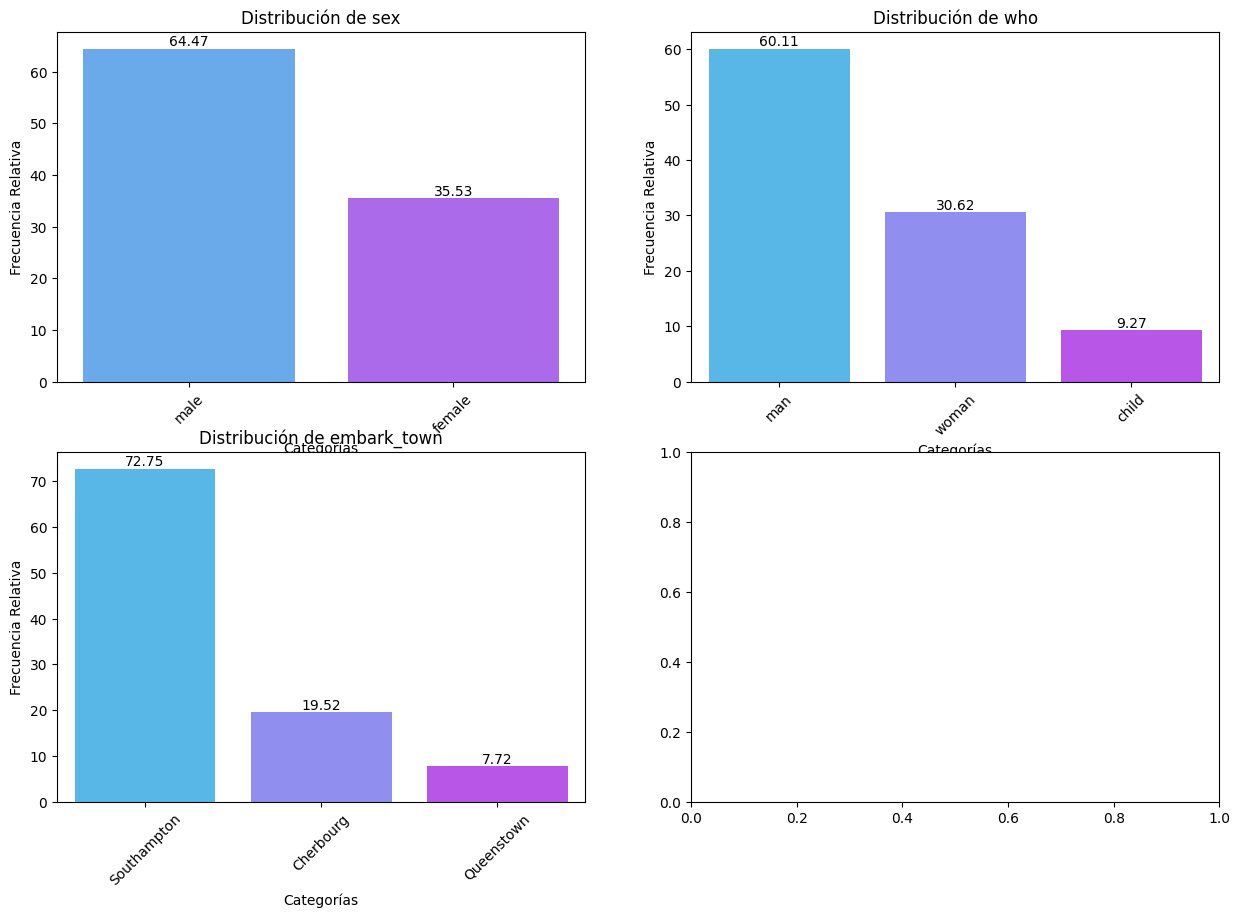

In [21]:
frecuencias_relativas(df_eda, col_cat)

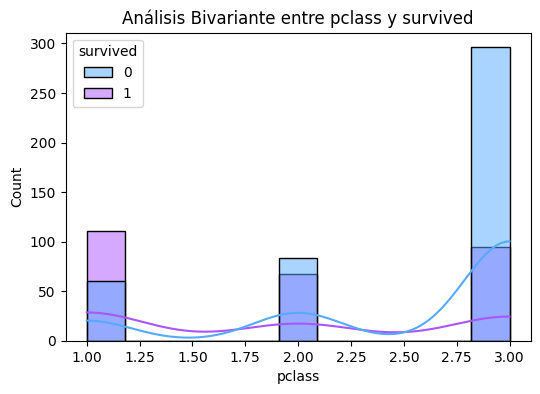

In [22]:
histograma_bivariante(df_eda, "pclass", target)

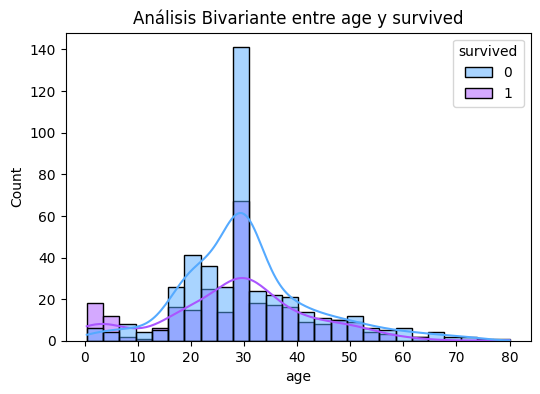

In [23]:
histograma_bivariante(df_eda, "age", target)

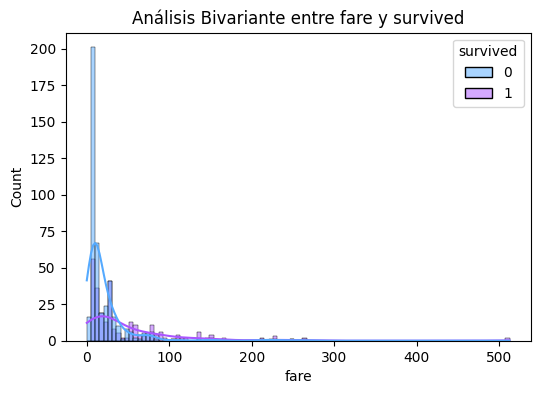

In [24]:
histograma_bivariante(df_eda, "fare", target)

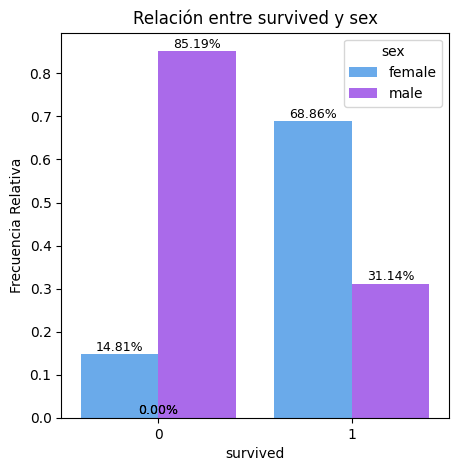

In [25]:
bivariante_cat(df_eda, target, "sex")

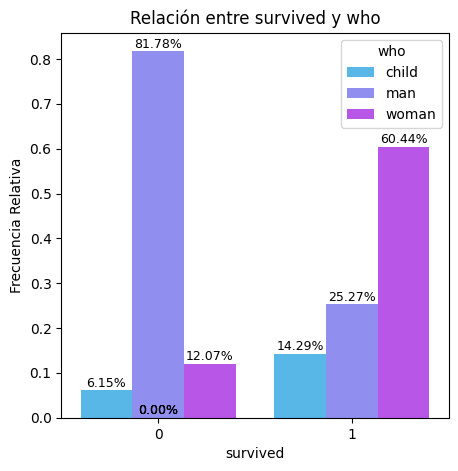

In [26]:
bivariante_cat(df_eda, target, "who")

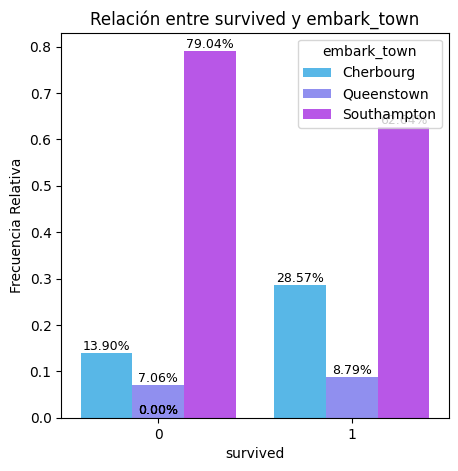

In [27]:
bivariante_cat(df_eda, target, "embark_town")

In [28]:
df_eda.corr(numeric_only= True)[target]

pclass     -0.348007
age        -0.076462
fare        0.275499
alone      -0.215570
survived    1.000000
Name: survived, dtype: float64

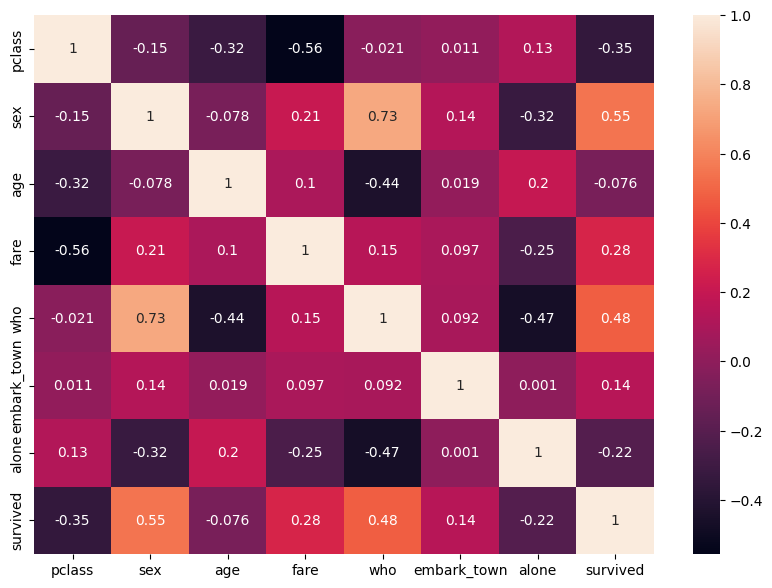

In [29]:
plt.figure(figsize = (10,7))
sns.heatmap(df_eda.replace({'Southampton':0, 'Cherbourg':1, 'Queenstown':2,'male':0, 'female':1,'man': 0, 'woman':1, 'child':2}).corr(numeric_only = True),annot=True);
plt.show();

In [30]:
X_train = pd.get_dummies(X_train, columns = ["sex", "who","embark_town"], dtype = int)

In [31]:
X_train["fare"] = np.log(X_train["fare"]+1)

<Axes: >

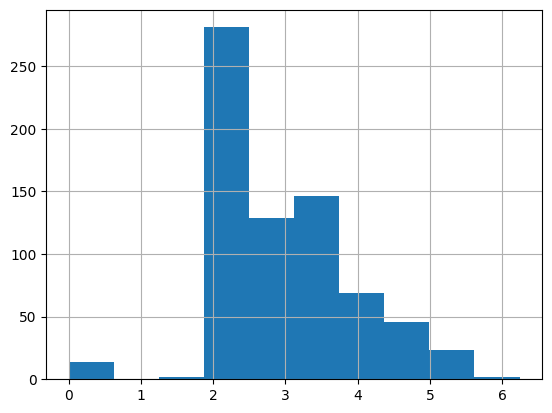

In [32]:
X_train["fare"].hist()

In [33]:
X_test = pd.get_dummies(X_test, columns = ["sex", "who","embark_town"], dtype = int)
X_test["fare"] = np.log(X_test["fare"]+1)

In [34]:
features = ["age", "fare"]

In [35]:
columns_to_standardize = ['age', 'fare']
data_to_standardize = X_train[columns_to_standardize]

# Inicializar el StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_standardize)
df_standardized = pd.DataFrame(scaled_data, columns=columns_to_standardize, index=X_train.index)
X_train_std = pd.concat([X_train.drop(columns=columns_to_standardize), df_standardized], axis=1)
X_train_std

,pclass,alone,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,age,fare
692,3,1,0,1,0,1,0,0,0,1,-5.463229e-16,1.124592
481,2,1,0,1,0,1,0,0,0,1,-5.463229e-16,-3.014278
527,1,1,0,1,0,1,0,0,0,1,-5.463229e-16,2.508198
855,3,0,1,0,0,0,1,0,0,1,-9.078708e-01,-0.627019
801,2,0,1,0,0,0,1,0,0,1,9.167471e-02,0.361872
...,...,...,...,...,...,...,...,...,...,...,...,...
359,3,1,1,0,0,0,1,0,1,0,-5.463229e-16,-0.783592
258,1,1,1,0,0,0,1,1,0,0,3.992272e-01,3.360891
736,3,0,1,0,0,0,1,0,0,1,1.398773e+00,0.628438
462,1,1,0,1,0,1,0,0,0,1,1.321885e+00,0.741106


In [36]:
X_test.isna().sum()

pclass                      0
age                        40
fare                        0
alone                       0
sex_female                  0
sex_male                    0
who_child                   0
who_man                     0
who_woman                   0
embark_town_Cherbourg       0
embark_town_Queenstown      0
embark_town_Southampton     0
dtype: int64

In [37]:
X_test["age"].fillna(media_edad, inplace = True)

In [38]:
data_to_standardize = X_test[columns_to_standardize]

scaled_data = scaler.transform(data_to_standardize)
df_standardized = pd.DataFrame(scaled_data, columns=columns_to_standardize, index=X_test.index)
X_test_std = pd.concat([X_test.drop(columns=columns_to_standardize), df_standardized], axis=1)
X_test_std

,pclass,alone,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,age,fare
565,3,0,0,1,0,1,0,0,0,1,-4.465421e-01,0.279952
160,3,0,0,1,0,1,0,0,0,1,1.091220e+00,-0.114127
553,3,1,0,1,0,1,0,1,0,0,-6.003184e-01,-0.861771
860,3,0,0,1,0,1,0,0,0,1,8.605559e-01,-0.240625
241,3,0,1,0,0,0,1,0,1,0,-5.463229e-16,-0.150613
...,...,...,...,...,...,...,...,...,...,...,...,...
880,2,0,1,0,0,0,1,0,0,1,-3.696540e-01,0.352457
91,3,1,0,1,0,1,0,0,0,1,-7.540946e-01,-0.786472
883,2,1,0,1,0,1,0,0,0,1,-1.389896e-01,-0.519392
473,2,1,1,0,0,0,1,1,0,0,-5.234302e-01,-0.262258


In [39]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 5000)

log_reg.fit(X_train_std, y_train)

c:\Users\vanep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [45]:
print(log_reg.intercept_)
print(log_reg.coef_)


[2.40554943]
[[-1.08889897  0.37573259  0.43825754 -0.43787642  0.41624151 -1.21465956
   0.79879916  0.12949032  0.25097229 -0.3800815  -0.34020425  0.15068978]]


In [47]:
coef_df = pd.DataFrame(log_reg.coef_.T, X_train_std.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
pclass,-1.088899
alone,0.375733
sex_female,0.438258
sex_male,-0.437876
who_child,0.416242
who_man,-1.214660
who_woman,0.798799
embark_town_Cherbourg,0.129490
embark_town_Queenstown,0.250972
embark_town_Southampton,-0.380081


In [48]:
predicc_train = log_reg.predict(X_train_std)
predicc_test = log_reg.predict(X_test_std)

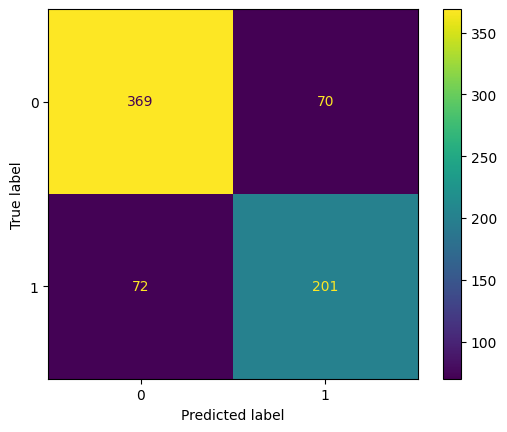

In [52]:
metrics.ConfusionMatrixDisplay.from_predictions(y_train, predicc_train)

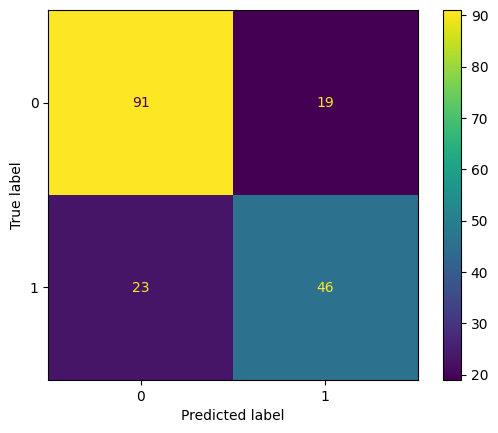

In [53]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicc_test)

In [55]:
print('Accuracy Train',metrics.accuracy_score(y_train,predicc_train))
print('Accuracy Test',metrics.accuracy_score(y_test,predicc_test))

print('Recall Train',metrics.recall_score(y_train,predicc_train))
print('Recall Test',metrics.recall_score(y_test,predicc_test))

print('F1-Score Train',metrics.f1_score(y_train,predicc_train))
print('F1-Score Test',metrics.f1_score(y_test,predicc_test))


Accuracy Train 0.800561797752809
Accuracy Test 0.7653631284916201
Recall Train 0.7362637362637363
Recall Test 0.6666666666666666
F1-Score Train 0.738970588235294
F1-Score Test 0.6865671641791045


In [56]:
print(metrics.classification_report(y_test, predicc_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       110
           1       0.71      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179

